# Code for Figures

[Download the notebook](https://github.com/neuro4ml/neuro4ml.github.io/blob/main/materials/w7/w7-figures.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuro4ml/neuro4ml.github.io/blob/main/materials/w7/w7-figures.ipynb)

In [1]:
!pip install brian2 -q
from brian2 import *
from numpy.random import choice

C:\Users\dgoodman\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Decision making

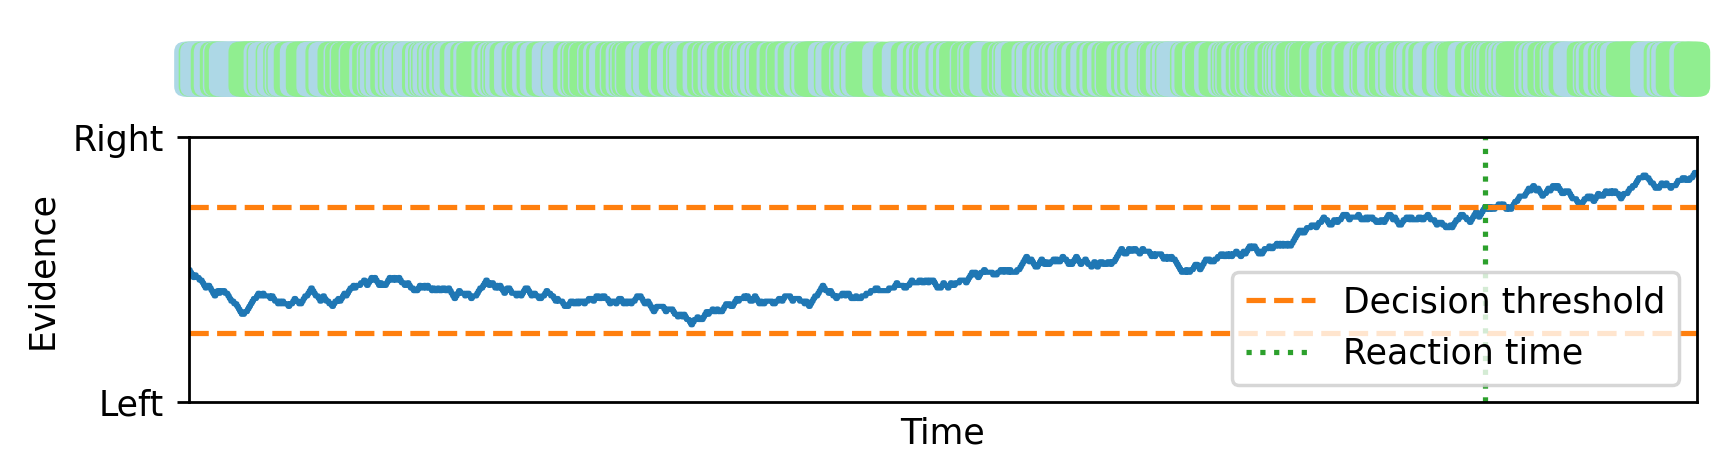

In [168]:
def drift_diffusion_figure(n, s=21303, thresh_frac=0.85, p=[0.4, 0.3, 0.3]):
    seed(s)
    x = choice([1, 0, -1], p=p, size=n)
    y = hstack(([0], cumsum(x)))[:-1]
    ymean = (2*n/pi)**.5
    ythresh = ymean*thresh_frac
    I, = (abs(y)>=ythresh).nonzero()
    RT = min(I) if len(I) else n+1
    f, (ax_top, ax_bottom) = subplots(2, 1, gridspec_kw=dict(height_ratios=[1, 6]), figsize=(7, 2), dpi=250, sharex=True)
    sca(ax_top)
    axhline(0, ls='-', c='k', lw=2)
    for t, d in enumerate(x):
        if d:
            #text(t, 0, {-1: 'L', 1: 'R'}[d], transform=ax_top.transData)
            if n<=30:
                txt = {-1: 'L', 1: 'R'}[d]
            else:
                txt = ' '
            annotate(txt, xy=(t+1, 0), xytext=(t+1, 0), bbox=dict(boxstyle='round', ec='none', fc='lightblue' if d==-1 else 'lightgreen'), ha='center', va='center')
    gca().set_frame_on(False)
    xticks([])
    yticks([])
    #subplot(2, 1, 2, sharex=ax)
    sca(ax_bottom)
    plot(y, drawstyle='steps-post', c='C0')
    axhline(-ythresh, ls='--', c='C1', label='Decision threshold')
    axhline(ythresh, ls='--', c='C1')
    axvline(RT, ls=':', c='C2', label='Reaction time')
    xlim(0, n-0.5)
    xticks([])
    xlabel('Time')
    ylim(-2*ymean, 2*ymean)
    yticks([-2*ymean, 2*ymean], ['Left', 'Right'])
    ylabel('Evidence')
    legend(loc='lower right')
    tight_layout()

bias_p = lambda q: (1/3+q, 1/3-q/2, 1/3-q/2)
drift_diffusion_figure(1000, s=None, thresh_frac=.95, p=bias_p(0.01))

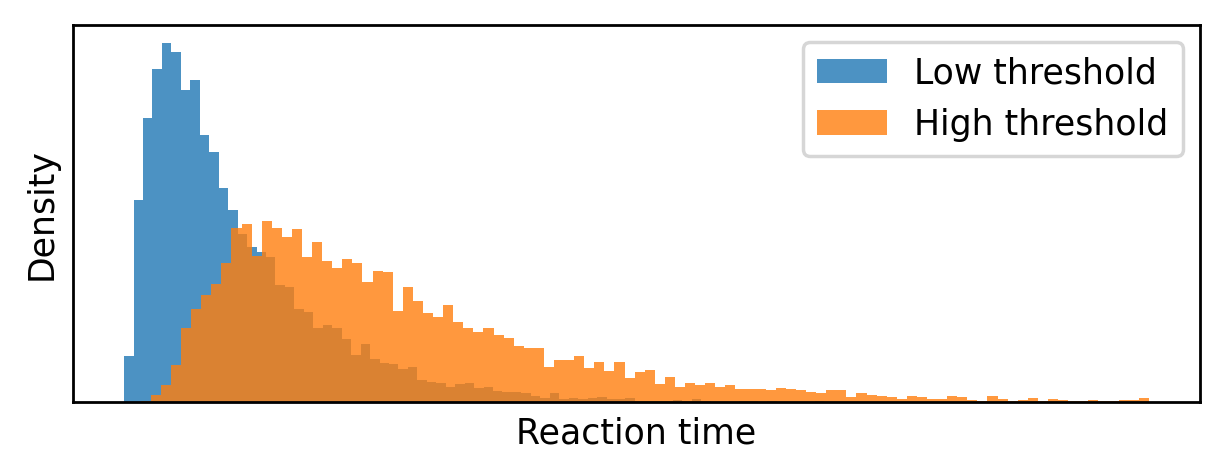

In [193]:
def reaction_times(n, repeats=10000, thresh_frac=0.6, p=[0.4, 0.3, 0.3]):
    x = choice([1, 0, -1], p=p, size=(n, repeats))
    y = cumsum(x, axis=0)
    ymean = (2*n/pi)**.5
    ythresh = ymean*thresh_frac
    I = abs(y)>=ythresh
    RT = I.argmax(axis=0)
    RT = RT[RT>0]
    return RT

figure(figsize=(5, 2), dpi=250)
hist(reaction_times(1000, thresh_frac=0.4, p=bias_p(0.05)), bins=100, label='Low threshold', alpha=0.8)
hist(reaction_times(1000, thresh_frac=0.8, p=bias_p(0.05)), bins=100, label='High threshold', alpha=0.8)
xlabel('Reaction time')
ylabel('Density')
yticks([])
xticks([])
legend(loc='upper right')
tight_layout();